# Exercise 4 - Simple Autoencoders

In this exercise we will construct a simple autoencoder for the sample of the CIFAR-10 dataset, compressing the information stored within the images for later use.

Import pickle, numpy, matplotlib as well as the *Model* class from **keras.models** and *Input* and *Dense* from **keras.layers**.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.


Load the data

In [2]:
with open('data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

As this is an unsupervised learning method, we are only interested in the image data.  Load the image data as per the previous exercise.

In [3]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

Convert the image to grayscale, scale between 0 and 1 and flatten each to a single 1024 length vector.

In [4]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

Define the autoencoder model.  As we need access to the output of the encoder stage we will need to define the model using a slightly different method to that previously used.  Define an input layer of 1024 units.

In [5]:
input_layer = Input(shape=(1024,))

Define a subsquent Dense layer of 256 units (a compression ratio of 1024 / 256 = 4) and a ReLU activation function as the encoding stage.  Notice that we have assigned the layer to a variable and passed the previous layer to a call method for the class.

In [6]:
encoding_stage = Dense(256, activation='relu')(input_layer)

Instructions for updating:
Colocations handled automatically by placer.


Define a subsequent decoder layer using the sigmoid function as an activation function and the same shape as the input layer.  The sigmoid function has been selected as the input values to the network are only between 0 and 1.

In [7]:
decoding_stage = Dense(1024, activation='sigmoid')(encoding_stage)

Construct the model by passing the first and last layers of the network to the Model class.

In [8]:
autoencoder = Model(input_layer, decoding_stage)

Compile the autoencoder using a binary cross entropy loss function and adadelta gradient descent.

In [9]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

Now let's fit the model, again we pass the images as the training data and as the desired output.  Train for 100 epochs.

In [10]:
autoencoder.fit(images, images, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10000/10000 [==============================] - 6s 558us/step - loss: 0.6849
Epoch 2/100
10000/10000 [==============================] - 5s 547us/step - loss: 0.6635
Epoch 3/100
10000/10000 [==============================] - 5s 539us/step - loss: 0.6512
Epoch 4/100
10000/10000 [==============================] - 5s 538us/step - loss: 0.6446
Epoch 5/100
10000/10000 [==============================] - 5s 535us/step - loss: 0.6384
Epoch 6/100
10000/10000 [==============================] - 4s 428us/step - loss: 0.6330
Epoch 7/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.6286
Epoch 8/100
10000/10000 [==============================] - 4s 408us/step - loss: 0.6247
Epoch 9/100
10000/10000 [==============================] - 4s 395us/step - loss: 0.6209
Epoch 10/100
10000/10000 [==============================] - 4s 404us/step - loss: 0.6169
Epoch 11/100
10000/10000 [==============================] - 4s 408us/st

10000/10000 [==============================] - 4s 426us/step - loss: 0.5784
Epoch 91/100
10000/10000 [==============================] - 4s 417us/step - loss: 0.5781
Epoch 92/100
10000/10000 [==============================] - 4s 404us/step - loss: 0.5783
Epoch 93/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5779
Epoch 94/100
10000/10000 [==============================] - 4s 423us/step - loss: 0.5779
Epoch 95/100
10000/10000 [==============================] - 4s 416us/step - loss: 0.5779
Epoch 96/100
10000/10000 [==============================] - 4s 418us/step - loss: 0.5777
Epoch 97/100
10000/10000 [==============================] - 4s 434us/step - loss: 0.5778
Epoch 98/100
10000/10000 [==============================] - 4s 428us/step - loss: 0.5776
Epoch 99/100
10000/10000 [==============================] - 4s 438us/step - loss: 0.5775
Epoch 100/100
10000/10000 [==============================] - 4s 404us/step - loss: 0.5775


Calculate and store the output of the encoding stage for the first 5 samples.

In [11]:
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

Reshape the encoder output to 16 x 16 (16 x 16 = 256) pixels and multiply by 255

In [12]:
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

Calculate and store the output of the decoding stage for the first 5 samples

In [13]:
decoder_output = autoencoder.predict(images[:5])

Reshape the output of the decoder to 32 x 32 and multiply by 255

In [14]:
decoder_output = decoder_output.reshape((-1, 32,32)) * 255

Plot the original image, the encoder output and the decoder.

In [15]:
images = images.reshape((-1, 32, 32))

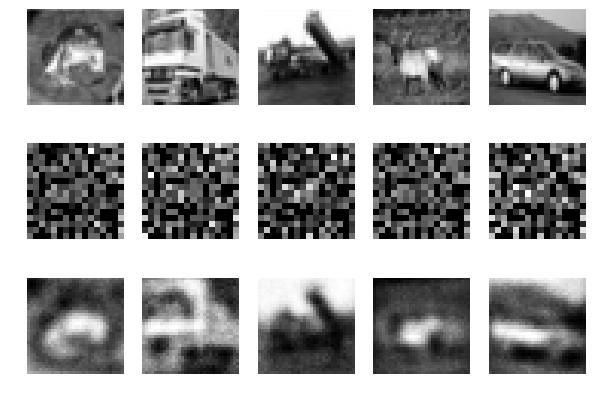

In [16]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        